# Documents

https://docs.google.com/document/d/1ObhwEqc5LgWqfJXNVkeAVHhkzz2rw2ufMNyIKzbQS0s/edit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
import sklearn
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer,recall_score, roc_curve, roc_auc_score
from tensorflow import keras

import json
import urllib.request as ur
from collections import Counter
from io import BytesIO
from math import ceil, pi
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile

# preparation

## importing data

In [ ]:
ply_features = pd.read_csv("/content/drive/MyDrive/AqualabValidation_Zach/featuredata/AQUALAB_20220601_to_20220715_c2ad3af_player-features.tsv", sep = "	")
ply_features.head()

,PlayerID,ActiveTime,JobsCompleted,SessionDiveSitesCount,SessionDuration,SessionGuideCount,SessionHelpCount,SessionID,SessionJobsCompleted,SwitchJobsCount,...,job55_JobsAttempted-std-dev-per-attempt,job55_JobsAttempted-job-difficulties,job56_JobsAttempted,job56_JobsAttempted-job-name,job56_JobsAttempted-num-starts,job56_JobsAttempted-num-completes,job56_JobsAttempted-percent-complete,job56_JobsAttempted-avg-time-per-attempt,job56_JobsAttempted-std-dev-per-attempt,job56_JobsAttempted-job-difficulties
0,NaN,No events,[],0.0,0:12:17.605281,0.0,0.0,player,0.0,0.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."
1,PetiteYahoo,0:10:18,['coral-stressed'],1.0,0:12:41,0.0,1.0,player,1.0,4.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."
2,NaN,No events,[],0.0,2:08:01.780153,0.0,0.0,player,0.0,0.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."
3,ModestOpera,0:00:00,[],0.0,0:00:00,0.0,0.0,player,0.0,0.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."
4,FilmyQueen,"1 day, 2:00:15","['kelp-energy', 'coral-turtle-population', 'di...",2.0,"1 day, 2:21:02",0.0,20.0,player,6.0,12.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."


In [5]:
ply_features = ply_features.loc[ply_features.PlayerID.isna() != True]

ply_features.describe()

,SessionDiveSitesCount,SessionGuideCount,SessionHelpCount,SessionJobsCompleted,SwitchJobsCount,job0_JobActiveTime,job1_JobActiveTime,job2_JobActiveTime,job3_JobActiveTime,job4_JobActiveTime,...,job55_JobsAttempted-num-completes,job55_JobsAttempted-percent-complete,job55_JobsAttempted-avg-time-per-attempt,job55_JobsAttempted-std-dev-per-attempt,job56_JobsAttempted,job56_JobsAttempted-num-starts,job56_JobsAttempted-num-completes,job56_JobsAttempted-percent-complete,job56_JobsAttempted-avg-time-per-attempt,job56_JobsAttempted-std-dev-per-attempt
count,501.000000,501.0,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.0,501.000000,...,501.0,501.0,501.0,501.0,501.0,501.0,501.0,501.0,501.0,501.0
mean,2.816367,0.0,5.063872,3.393214,8.964072,151.281437,-276.674651,45.658683,0.0,98.722555,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
std,2.361824,0.0,7.706615,3.951085,9.022567,619.487597,11018.288489,214.019946,0.0,245.010214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-246199.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.0,2.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
75%,5.000000,0.0,7.000000,5.000000,13.000000,71.000000,255.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
max,10.000000,0.0,71.000000,29.000000,62.000000,11920.000000,3771.000000,3022.000000,0.0,2605.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0


In [6]:
ply_features.shape

(1863, 1272)

In [7]:
id_col = ['PlayerID']
job_col = []
aggr_col = []
for col in ply_features.columns:
  pieces = col.split('_')
  prefix = pieces[0]
  if prefix.startswith('job'):
    job_col.append(pieces[1])
  else:
    aggr_col.append(col)
job_col = Counter(job_col)
print(f"{len(ply_features.columns)} perjobfeatures in {len(job_col)} groups:")
pprint(job_col, compact=False)

1272 perjobfeatures in 22 groups:
Counter({'JobActiveTime': 57,
         'JobArgumentationTime': 57,
         'JobCompletionTime': 57,
         'JobDiveSitesCount': 57,
         'JobDiveTime': 57,
         'JobExperimentationTime': 57,
         'JobGuideCount': 57,
         'JobHelpCount': 57,
         'JobHelpCount-ByTask': 57,
         'JobLocationChanges': 57,
         'JobLocationChanges-ByTask': 57,
         'JobModelingTime': 57,
         'JobTasksCompleted': 57,
         'SyncCompletionTime': 57,
         'JobsAttempted': 57,
         'JobsAttempted-job-name': 57,
         'JobsAttempted-num-starts': 57,
         'JobsAttempted-num-completes': 57,
         'JobsAttempted-percent-complete': 57,
         'JobsAttempted-avg-time-per-attempt': 57,
         'JobsAttempted-std-dev-per-attempt': 57,
         'JobsAttempted-job-difficulties': 57})


In [8]:
aggr_col = aggr_col[1:]
pprint(aggr_col)

['ActiveTime',
 'JobsCompleted',
 'SessionDiveSitesCount',
 'SessionDuration',
 'SessionGuideCount',
 'SessionHelpCount',
 'SessionID',
 'SessionJobsCompleted',
 'SwitchJobsCount',
 'TopJobCompletionDestinations',
 'TopJobSwitchDestinations',
 'TotalArgumentationTime',
 'TotalDiveTime',
 'TotalExperimentationTime',
 'UserAvgSessionDuration',
 'UserSessionCount',
 'UserTotalSessionDuration']


In [9]:
DBexport = json.load(open("/content/drive/MyDrive/AqualabValidation_Zach/DBExport.json"))

In [10]:
Complexity_df = pd.DataFrame(columns=['job_id', 'job_name', 'argumentation', 'experimentation', 'modeling'])
for id, job in enumerate(DBexport.get('jobs')):
  Complexity_df.loc[len(Complexity_df.index)] = [id, job['id'], job['difficulties']['argumentation'],
                                                 job['difficulties']['experimentation'],
                                                 job['difficulties']['modeling']] 
Complexity_df.head()

,job_id,job_name,argumentation,experimentation,modeling
0,0,arctic-missing-whale,2,0,0
1,1,arctic-time-of-death,5,0,0
2,2,arctic-whale-csi,0,0,0
3,3,displaced-reef,2,0,0
4,4,hide-n-seek,1,3,4


In [12]:
labels = pd.read_excel("/content/drive/MyDrive/AqualabValidation_Zach/surveydata/Aqualab Practices Survey June 2022 scores final.xlsx",
                       sheet_name='Simplified')
labels = labels.rename({'Modeling_score_max_5)':'Modeling_score_max_5'}, axis='columns')
labels.head()

,user_code,Experiment_score_max_5,Modeling_score_max_5,Argument_score_max_4
0,SeventhBran,2.0,1.0,0.0
1,HangingWhorl,5.0,3.0,3.0
2,RougeShift,3.0,3.0,3.0
3,VerticalWaist,5.0,2.0,4.0
4,InsecureSample,5.0,4.0,3.0


## keep listed aggregate columns

'SessionCount',  
 'JobsCompleted',  
 'SessionDiveSitesCount',  
 'SwitchJobsCount',  
 'TopJobCompletionDestinations',  ??  
 'TopJobSwitchDestinations'  ??  
 'SyncSimulation',  
 'TotalArgumentationTime',  
 'TotalExperimentEnd',  
 'TotalFactsReceived',  
 'TotalModelingAttempted',  
 'TotalModelingIntervene',  
 'TotalModelingPrediction'


In [14]:
aggr_features = ply_features[['PlayerID', 'UserSessionCount', 'JobsCompleted', 
                              'SessionDiveSitesCount', 'SwitchJobsCount',
                              'SyncSimulation', 'TotalArgumentationTime',
                              'TotalExperimentEnd', 'TotalFactsReceived',
                              'TotalModelingAttempted', 'TotalModelingIntervene',
                              'TotalModelingPrediction']]

KeyError: ignored

## Generate new aggregate columns from listed perjob features

'JobGuideCount'  only 0  
'JobHelpCount'  
'JobLocationChanges'  
'TotalLocationChanges'  ???  
'JobTasksCompleted'  
'JobsAttempted'  
'JobsAttempted-num-starts'  
'JobsAttempted-percent-complete'


In [18]:
for column in ['JobHelpCount', 'JobTasksCompleted', 
               'JobsAttempted', 'JobsAttempted-num-starts']:
  features_list = list(map(lambda x: 'job'+str(x)+'_'+column, range(56)))
  aggr_features[column] = ply_features[features_list].sum(axis = 1)

NameError: ignored

In [16]:
aggr_features.describe()

NameError: ignored

In [ ]:
# see features
# ply_features[list(map(lambda x: 'job'+str(x)+'_'+'JobLocationChanges', range(60)))].describe()

# Visualization

## Labels visualization

(array([19.,  0., 70.,  0., 80.,  0., 68.,  0., 37., 23.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

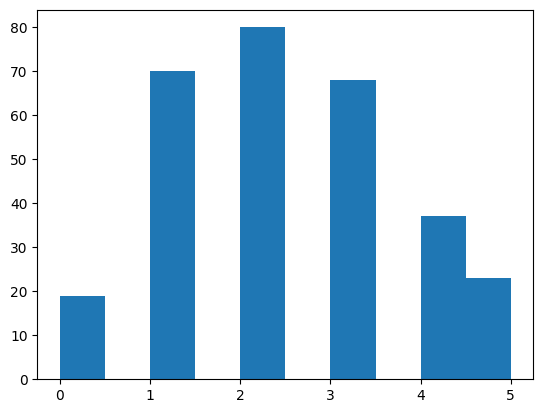

In [19]:
plt.hist(labels.Modeling_score_max_5.astype('category'))

(array([86.,  0., 75.,  1.,  0., 46.,  0., 68.,  0., 21.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

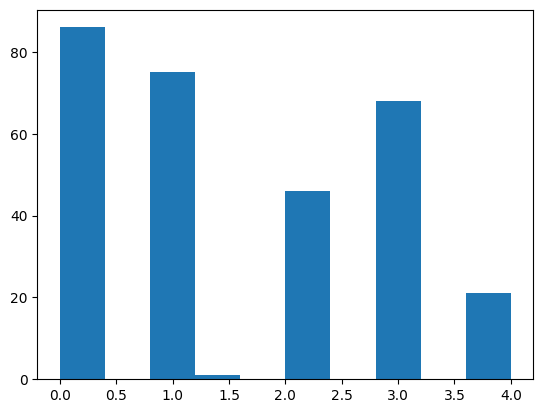

In [20]:
plt.hist(labels.Argument_score_max_4.astype('category'))

## Performance of some new aggregate features

 'SyncSimulation',  
 'TotalArgumentationTime',  
 'TotalExperimentEnd',  
 'TotalFactsReceived',  
 'TotalModelingAttempted',  
 'TotalModelingIntervene',  
 'TotalModelingPrediction'


In [ ]:
df_inner = pd.merge(aggr_features, labels, left_on = 'PlayerID', right_on = 'user_code', how='inner').drop('user_code', axis = 1)
df_inner.head()

,PlayerID,SessionCount,JobsCompleted,SessionDiveSitesCount,SwitchJobsCount,SyncSimulation,TotalArgumentationTime,TotalExperimentEnd,TotalFactsReceived,TotalModelingAttempted,TotalModelingIntervene,TotalModelingPrediction,JobHelpCount,JobTasksCompleted,JobsAttempted,JobsAttempted-num-starts,Experiment_score_max_5,Modeling_score_max_5,Argument_score_max_4
0,SeventhBran,3,11,7,29,0,0:07:31,21,56,5,0,0,2,28,1770,12,2.0,1.0,0.0
1,CheerfulSalt,3,6,6,18,0,0:09:02,6,17,2,0,0,13,21,1770,8,5.0,1.0,1.0
2,FervidClinic,3,4,4,11,0,0:02:05,7,6,3,0,0,23,13,1770,5,4.0,1.0,4.0
3,InsecureSample,3,6,6,18,0,0:05:17,3,26,2,0,0,3,19,1770,8,5.0,4.0,3.0
4,RuinousMap,4,15,8,36,0,0:19:58,29,113,8,0,0,16,32,1770,16,5.0,1.0,3.0


Text(0, 0.5, 'ModelingFactsReceived')

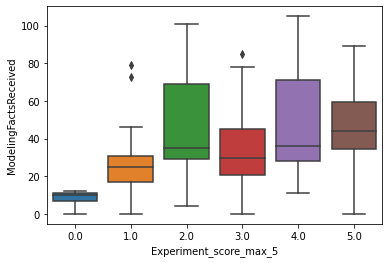

In [ ]:
var = 'ModelingFactsReceived'
sns.boxplot(x='Experiment_score_max_5', y='value',
            data=df_inner.melt(id_vars='Experiment_score_max_5', value_vars=[var]))
plt.ylabel(var)

Text(0, 0.5, 'ModelingFactsReceived')

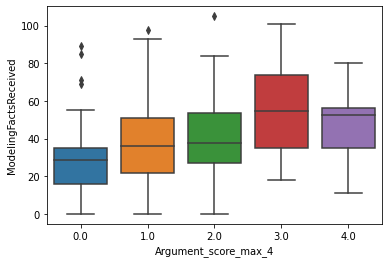

In [ ]:
sns.boxplot(x='Argument_score_max_4', y='value',
            data=df_inner.melt(id_vars='Argument_score_max_4', value_vars=[var]))
plt.ylabel(var)

Text(0, 0.5, 'ModelingFactsReceived')

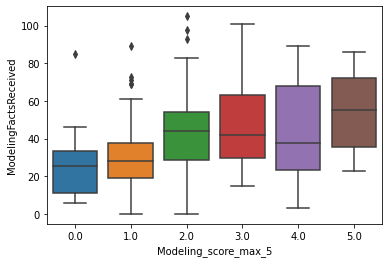

In [ ]:
sns.boxplot(x='Modeling_score_max_5', y='value',
            data=df_inner.melt(id_vars='Modeling_score_max_5', value_vars=[var]))
plt.ylabel(var)

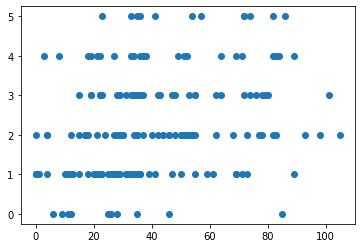

In [ ]:
plt.scatter(df_inner.ModelingFactsReceived, df_inner.Modeling_score_max_5)

Text(0, 0.5, 'ModelingFactsReceived>0')

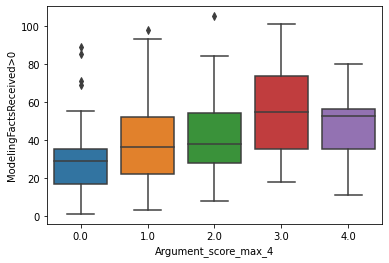

In [ ]:
sns.boxplot(x='Argument_score_max_4', y='value',
            data=df_inner[df_inner[var]>0].melt(id_vars='Argument_score_max_4', value_vars=[var]))
plt.ylabel(var+">0")

Text(0, 0.5, 'ModelingFactsReceived>0')

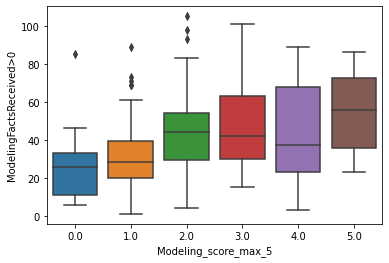

In [ ]:
sns.boxplot(x='Modeling_score_max_5', y='value',
            data=df_inner[df_inner[var]>0].melt(id_vars='Modeling_score_max_5', value_vars=[var]))
plt.ylabel(var+">0")

Text(0, 0.5, 'SyncSimulation')

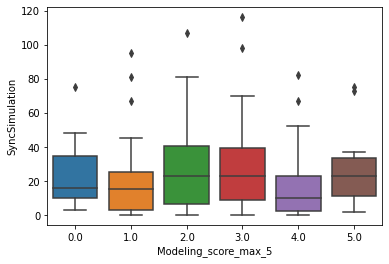

In [ ]:
sns.boxplot(x='Modeling_score_max_5', y='value',
            data=df_inner.melt(id_vars='Modeling_score_max_5', value_vars=["JobHelpCount"]))
plt.ylabel("SyncSimulation")

Text(0, 0.5, 'SyncSimulation')

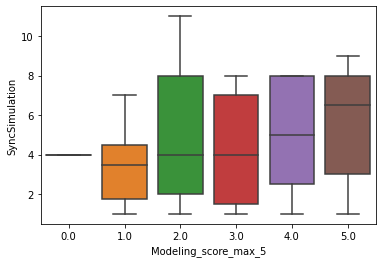

In [ ]:
sns.boxplot(x='Modeling_score_max_5', y='value',
            data=df_inner[df_inner.SyncSimulation>0].melt(id_vars='Modeling_score_max_5', value_vars=["SyncSimulation"]))
plt.ylabel("SyncSimulation")

Text(0, 0.5, 'TotalModelingPrediction')

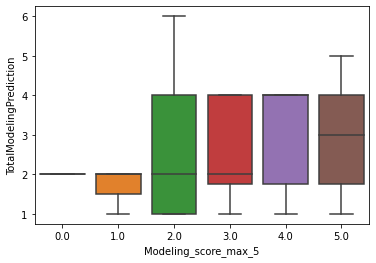

In [ ]:
sns.boxplot(x='Modeling_score_max_5', y='value',
            data=df_inner[df_inner.TotalModelingPrediction>0].melt(id_vars='Modeling_score_max_5', value_vars=["TotalModelingPrediction"]))
plt.ylabel("TotalModelingPrediction")

Text(0, 0.5, 'TotalFactsReceived')

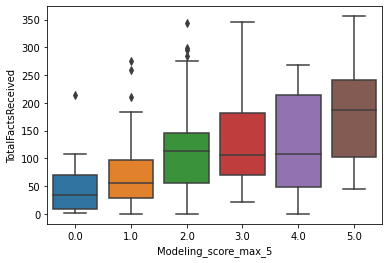

In [ ]:
sns.boxplot(x='Modeling_score_max_5', y='value',
            data=df_inner.melt(id_vars='Modeling_score_max_5', value_vars=["TotalFactsReceived"]))
plt.ylabel("TotalFactsReceived")

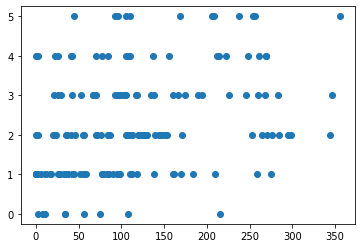

In [ ]:
plt.scatter(df_inner["TotalFactsReceived"], df_inner['Modeling_score_max_5'])

# Regression

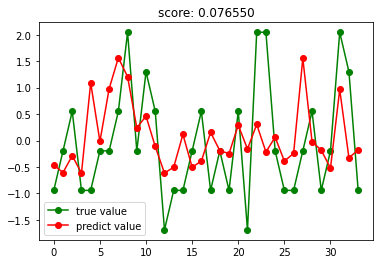

In [ ]:
response = "Modeling_score_max_5"
predictors = ['TotalFactsReceived', 'JobsCompleted', 'SessionDiveSitesCount', 'SwitchJobsCount']
x = df_inner[predictors].values
y = df_inner[response].values
std_x = StandardScaler().fit_transform(x)
std_y = StandardScaler().fit_transform(np.array(y)[:,np.newaxis])
model = LR()
x_train, x_test, y_train, y_test = train_test_split(std_x, std_y, test_size=0.2, shuffle=True)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
result = model.predict(x_test)
plt.figure()
plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
plt.title('score: %f'%score)
plt.legend()
plt.show()

# Classification

In [ ]:
df__ = df_inner[df_inner.Modeling_score_max_5.isin([1, 5])]
df__

,PlayerID,SessionCount,JobsCompleted,SessionDiveSitesCount,SwitchJobsCount,SyncSimulation,TotalArgumentationTime,TotalExperimentEnd,TotalFactsReceived,TotalModelingAttempted,...,TotalModelingPrediction,JobHelpCount,JobTasksCompleted,JobsAttempted,JobsAttempted-num-starts,Experiment_score_max_5,Modeling_score_max_5,Argument_score_max_4,ModelingFactsReceived,ExperimentFactsReceived
0,SeventhBran,3,11,7,29,0,0:07:31,21,56,5,...,0,2,28,1770,12,2.0,1.0,0.0,29,12
1,CheerfulSalt,3,6,6,18,0,0:09:02,6,17,2,...,0,13,21,1770,8,5.0,1.0,1.0,18,8
2,FervidClinic,3,4,4,11,0,0:02:05,7,6,3,...,0,23,13,1770,5,4.0,1.0,4.0,11,5
4,RuinousMap,4,15,8,36,0,0:19:58,29,113,8,...,0,16,32,1770,16,5.0,1.0,3.0,36,16
5,PiercingQuiver,3,15,9,33,0,0:14:44,22,95,10,...,0,25,34,1770,16,3.0,1.0,2.0,33,16
8,DullMorbid,3,14,10,32,1,0:26:06,27,83,10,...,0,3,42,1770,16,3.0,1.0,0.0,32,16
10,DroopyDivan,3,7,7,20,0,0:06:58,6,36,5,...,0,1,23,1770,9,4.0,1.0,0.0,20,9
11,EdgyChafe,3,8,6,20,0,0:06:43,28,44,10,...,0,30,24,1770,9,3.0,1.0,0.0,20,9
12,TerseCrab,3,4,6,10,0,0:12:24,9,28,3,...,0,1,15,1770,5,3.0,1.0,0.0,10,5
15,FemaleYin,10,12,8,33,1,0:35:53,16,93,15,...,1,2,30,1770,12,2.0,5.0,3.0,33,12


<ipython-input-164-6991d449aa19>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (y>3).astype(np.int)


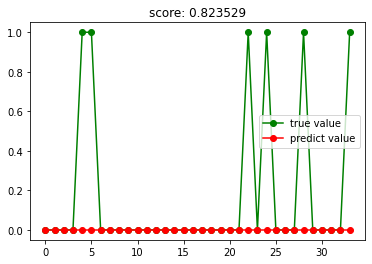

In [ ]:
response = "Modeling_score_max_5"
predictors = ['TotalFactsReceived', 'JobsCompleted', 'SessionDiveSitesCount', 'SwitchJobsCount']
x = df_inner[predictors].values
y = df_inner[response].values
y = (y>3).astype(np.int)
std_x = StandardScaler().fit_transform(x)
std_y = y
model = sklearn.linear_model.LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(std_x, std_y, test_size=0.2, shuffle=True)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
result = model.predict(x_test)
plt.figure()
plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
plt.title('score: %f'%score)
plt.legend()
plt.show()

In [ ]:
y_train

array([[-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [ 1.99263349],
       [ 1.99263349],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [ 1.99263349],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [ 1.99263349],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [ 1.99263349],
       [ 1.99263349],
       [-0.50184844],
       [-0.50184844],
       [ 1.99263349],
       [-0.50184844],
       [-0.50184844],
       [ 1.99263349],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [ 1.99263349],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [ 1.99263349],
       [-0.50184844],
       [-0.50184844],
       [-0.50184844],
       [-0